#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#### Initial steps-making and plotting the points

In [2]:
number_of_points = 500
np.random.seed(3)

# bias_every_point = np.ones(number_of_points)

## top region points
random_x1_values_top = np.random.normal(13, 2, number_of_points)
random_x2_values_top = np.random.normal(12, 2, number_of_points)
top_region_points = np.array([random_x1_values_top, random_x2_values_top]).T
# print(top_region_points.shape)   # // (2, 50), after transpose-> (50, 2)

## bottom region points
random_x1_values_bot = np.random.normal(8, 2, number_of_points)
random_x2_values_bot = np.random.normal(6, 2, number_of_points)
bottom_region_points = np.array([random_x1_values_bot, random_x2_values_bot]).T

## all points
all_points = np.vstack( (top_region_points, bottom_region_points) )

## Label
# y = np.array([np.zeros(number_of_points), np.ones(number_of_points) ] ).reshape(number_of_points * 2, 1)
# print(y.shape)       # // (2, 50), after reshaping -> (100, 1)
# y = np.array([np.zeros(number_of_points), np.ones(number_of_points)]).T
# print(y.shape)         # // (50, 2)
# // for y (label) to be the same size as all points (both = 100), we use np.append()
y = np.matrix(np.append(np.zeros(number_of_points), np.ones(number_of_points) ) ).T
# print(y.shape)  # // (100, 1)

#### Displaying the points

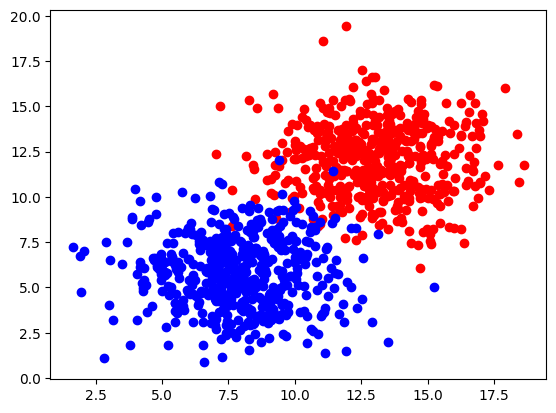

In [3]:
plt.scatter(top_region_points[ : , 0], top_region_points[ : , 1], color='r')
plt.scatter(bottom_region_points[ : , 0], bottom_region_points[ : , 1], color = 'b')

## Sequential Model

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

nn_model = Sequential()

nn_model.add(Dense(units=1, input_shape=(2,), activation='sigmoid') )

# adam = Adam(learning_rate=0.01)
adam = Adam(learning_rate=0.03)
nn_model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'] )

# nn_model_fit = nn_model.fit(x=all_points, y=y, verbose=1, batch_size=50, epochs=100, shuffle='true')
# // or h (the common variable for model.fit)

nn_model_fit = nn_model.fit(x=all_points, y=y, verbose=1, batch_size=15, epochs=20, shuffle='true')

D:\coding projects\PyCharm projects\new projects\S-D-C-2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.5289 - loss: 1.9656 
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.6836 - loss: 0.5759
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.7823 - loss: 0.4939
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.8711 - loss: 0.4042
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.9140 - loss: 0.3460
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.9471 - loss: 0.2931
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.9593 - loss: 0.2630
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.9609 - loss: 0.2415
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.9599 - loss: 0.2144
Epoch 10/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.9735 - loss: 0.1956
Epoch 11/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.9664 - loss: 0.1819
Epoch 12/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/ste

#### Plotting the accuracy chart/curve

Text(0.5, 1.0, 'Accuracy')

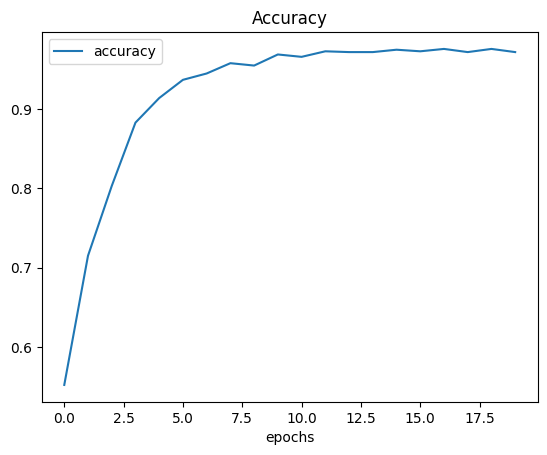

In [5]:
plt.plot(nn_model_fit.history['accuracy'])
plt.xlabel('epochs')
plt.legend(['accuracy'])
plt.title('Accuracy')

## Plotting the loss (error) curve

Text(0.5, 1.0, 'Loss')

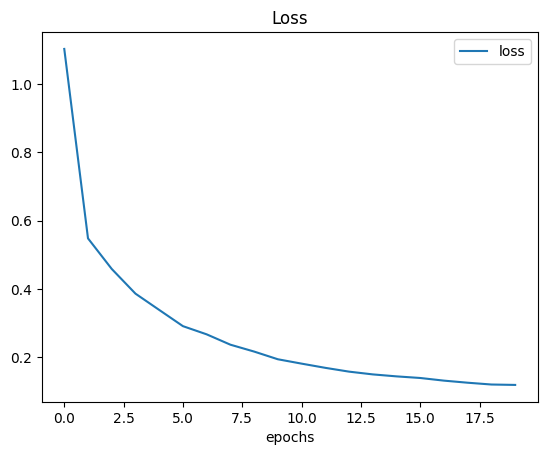

In [6]:
plt.plot(nn_model_fit.history['loss'])
plt.xlabel('epochs')
plt.legend(['loss'])
plt.title('Loss')

## plotting both accuracy and loss together (2 subplots)

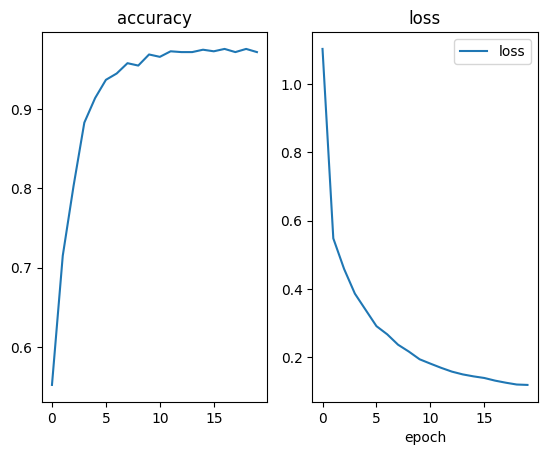

In [8]:
figure, axis = plt.subplots(1, 2)

axis[0].plot(nn_model_fit.history['accuracy'])
axis[0].set_title("accuracy")
plt.xlabel('epoch')
plt.legend(['accuracy'])

axis[1].plot(nn_model_fit.history['loss'])
axis[1].set_title("loss")
plt.xlabel('epoch')
plt.legend(['loss'])

plt.show()

## function-plotting the decision boundary

In [9]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[ : , 0]) - 1, max(X[ : , 0]) + 1, 50)
    y_span = np.linspace(min(X[ : , 1]) - 1, max(X[ : , 1]) + 1, 50)
    # print("x_span = ", x_span)     # // horizontal
    # print(f"y_span =  {y_span}")      # // vertical
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()  # // to flatten them from 2D to 1D
    grid = np.c_[xx_, yy_]
    prediction_function = model.predict(grid)
    prediction_function_reshaped = prediction_function.reshape(xx.shape)
    plt.contourf(xx, yy, prediction_function_reshaped)

## plotting the decision boundary prediction

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The prediction for the point is: [[97.58949]]%
The patient's status prediction is that he is: Healthy


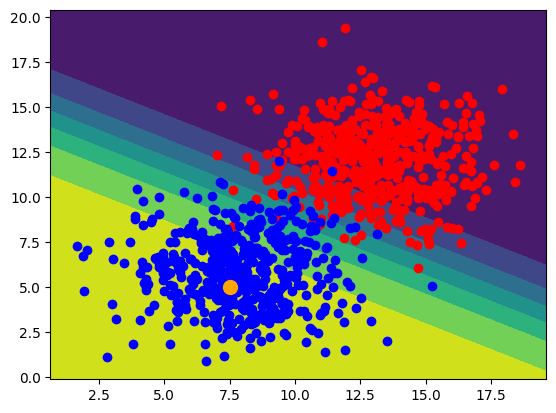

In [10]:
## plotting the contour
plot_decision_boundary(all_points, y, nn_model)

## plotting the points
plt.scatter(top_region_points[ : , 0], top_region_points[ : , 1], color='r')
plt.scatter(bottom_region_points[ : , 0], bottom_region_points[ : , 1], color = 'b')

## plotting the point to be predicted
point_x = 7.5
point_y = 5
point = np.array([[point_x, point_y] ] )
prediction = nn_model.predict(point) * 100

prediction_word = ''
if prediction >= 70:
    prediction_word = 'Healthy'
elif prediction < 70 and prediction > 30:
    prediction_word = 'moderatly healthy'
else:
    prediction_word = 'Unhealthy'

prediction = str(prediction) + '%'

plt.plot([point_x], [point_y], marker='o', markersize=10, color='orange')
print(f"The prediction for the point is: {prediction}")
print(f"The patient's status prediction is that he is: {prediction_word}")